# Esercitazione 10

**29 Aprile 2024**

*Gradiente*

In [1]:
import numpy as np
import scipy as sp
import sympy as syp
import matplotlib.pyplot as plt

import math

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [33]:
def scalar_prod(a, b):
    return a @ b

def steepest_descent(A, b, x0, toll, maxit):
    # Controllo validità matrice
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata!")
        return None, None, None, None
        
    x_curr = x0
    r_next, r_curr = None, scalar_prod(A, x_curr) - b
    attempts = []
    errors = []
    stop = False

    while not stop:
        # Direzione di discesa
        p_k = -r_curr

        # Step size
        alpha_k = scalar_prod(r_curr, r_curr) / scalar_prod(A @ r_curr, r_curr)

        # Prossimo iterato
        x_curr += alpha_k * p_k
        attempts.append(x_curr)
        r_next = A @ x_curr - b

        # Criterio di arresto
        errore = np.linalg.norm(r_next) / np.linalg.norm(b)
        errors.append(errore.copy())
        
        if errore <= toll or len(attempts) > maxit:
            stop = True
        else:
            r_curr = r_next

    # soluzione, vettore di k componenti (errori?), tentativi, # tentativi
    return x_curr, np.array(errors, dtype=float), attempts, len(attempts)

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si visualizzi l'errore ad ogni iterazione. La soluzione esatta del sistema è il vettore x=[-2,6])

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente e  visualizzare gli errori ad ogni iterazione.

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

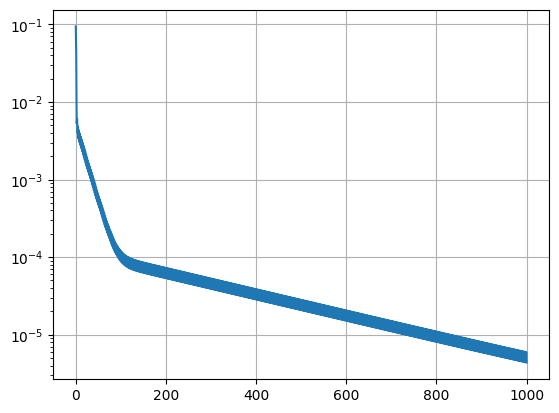

In [34]:
def get_condizionamento(idx):
    if idx in range(0, 10**2):
        return "Ben condizionata"
    if idx in range(10**2, 10**3):
        return "Mediamente malcondizionata"
    return "Altamente malcondizionata"

def is_symmetric(A, tol=np.spacing(1)):
    return np.all(np.abs(A - A.T) < tol)

def is_def_pos(A):
    if not is_symmetric(A):
        return False
    return np.all(np.linalg.eigvals(A) > 0)

n = 10
A = sp.linalg.hilbert(n)
b = np.sum(A, axis=1)
x0 = np.zeros(A.shape[0])
toll = 1e-10
maxit = 1000

print(A)
print("A è simmetrica?", is_symmetric(A))
print("A è definita positiva?", is_def_pos(A))

# Expected result: np.ones(b.shape)
res, errors, attempts, nr_attempts = steepest_descent(A, b, x0, toll, maxit)
plt.grid(True)
plt.semilogy(range(len(errors)), errors)

cond_hilbert = np.linalg.cond(A, np.inf)
print("Condizionamento della matrice A (Matrice di Hilbert): {:e} — {}".format(cond_hilbert, get_condizionamento(math.floor(cond_hilbert))))
print(f"Risultato: {res}")

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando il metodo del gradiente. Visualizzare graficamente l'errore ad ogni iterazione.

Condizionamento di D: 131.1515733495538 — Mediamente malcondizionata
[0.9937004  0.9865785  0.98204907 0.97573758 0.97317072 0.9694391
 0.9686294  0.9686294  0.9694391  0.97317072 0.97573758 0.98204907
 0.9865785  0.9937004  0.9865785  0.97574952 0.96231623 0.95522012
 0.94517721 0.94180082 0.93806931 0.93806931 0.94180082 0.94517721
 0.95522012 0.96231623 0.97574952 0.9865785  0.98204907 0.96231623
 0.94892073 0.93175636 0.92385107 0.91380861 0.91124212 0.91124212
 0.91380861 0.92385107 0.93175636 0.94892073 0.96231623 0.98204907
 0.97573758 0.95522012 0.93175636 0.91755206 0.90038861 0.89329366
 0.88698298 0.88698298 0.89329366 0.90038861 0.91755206 0.93175636
 0.95522012 0.97573758 0.97317072 0.94517721 0.92385107 0.90038861
 0.88699519 0.87356402 0.86903587 0.86903587 0.87356402 0.88699519
 0.90038861 0.92385107 0.94517721 0.97317072 0.9694391  0.94180082
 0.91380861 0.89329366 0.87356402 0.86273792 0.85561776 0.85561776
 0.86273792 0.87356402 0.89329366 0.91380861 0.94180082 0.969

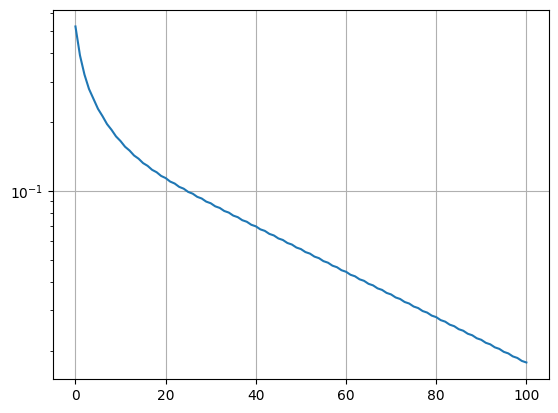

Condizionamento di D: 211.30318339819735 — Mediamente malcondizionata
[0.98998887 0.97916167 0.97098364 0.96078716 0.95493798 0.94696788
 0.9435307  0.93915258 0.93802781 0.93802781 0.93915258 0.9435307
 0.94696788 0.95493798 0.96078716 0.97098364 0.97916167 0.98998887
 0.97916167 0.9609737  0.93995344 0.92593171 0.90777334 0.89849527
 0.88615621 0.88160049 0.87722639 0.87722639 0.88160049 0.88615621
 0.89849527 0.90777334 0.92593171 0.93995344 0.9609737  0.97916167
 0.97098364 0.93995344 0.91592709 0.88695557 0.86951877 0.84700907
 0.83662774 0.82430649 0.82088218 0.82088218 0.82430649 0.83662774
 0.84700907 0.86951877 0.88695557 0.91592709 0.93995344 0.97098364
 0.96078716 0.92593171 0.88695557 0.85952673 0.82622365 0.80770544
 0.78523723 0.77600435 0.7680678  0.7680678  0.77600435 0.78523723
 0.80770544 0.82622365 0.85952673 0.88695557 0.92593171 0.96078716
 0.95493798 0.90777334 0.86951877 0.82622365 0.79773465 0.76450046
 0.74715675 0.72909599 0.72329907 0.72329907 0.72909599 0.74

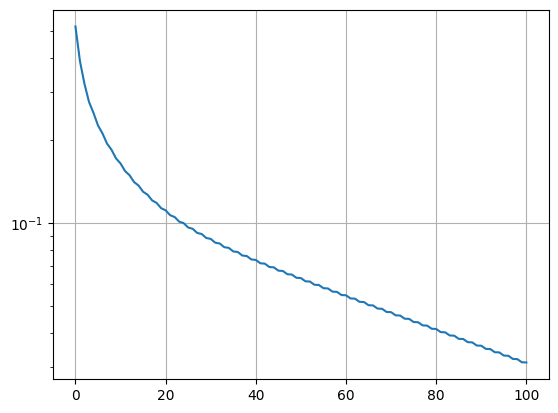

In [31]:
import creaG

def get_m(n):
    return (n-2)**2

def m_inverse(m):
    """
    Returns 'n' from a given 'm'
    """
    return np.sqrt(m) + 2

m_s = [16, 20]
b_s = []
x0_s = []
toll = np.spacing(1)
maxit = 100

for m in m_s:
    G = creaG.numgrid(m)
    D = creaG.delsq(G).todense().getA()
    b_s.append(np.sum(D, axis=1))
    x0_s.append(np.zeros(D.shape[0]))

for m, b, x0 in zip(m_s, b_s, x0_s):
    G = creaG.numgrid(m)
    D = creaG.delsq(G).todense().getA()
    cond_D = np.linalg.cond(D, np.inf)
    print("Condizionamento di D: {} — {}".format(cond_D, get_condizionamento(math.floor(cond_D))))
    res, errors, attempts, nr_attempts = steepest_descent(D, b, x0, toll, maxit)
    plt.grid(True)
    print(res)
    plt.semilogy(range(len(errors)), errors)
    plt.show()